# **Objective**: Exploratory Data Analysis (EDA)

Exploratory data analysis is a task performed by data scientists to get familiar with the data. All the initial tasks you do to understand your data well are known as EDA.

There are main components of exploring data:
1. Understanding data/Basic Data Exploration
2. Cleaning dataset
3. Understanding variables
4. Analyzing relationships between variables



# Importing Libraries

In [1]:
## install the newest version,  
## uncomment this line in first runtime, it needs to restart runtime
# !pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [2]:
# import pandas_profiling
# pandas_profiling.version.__version__
# => 2.9.0

In [3]:
import pandas as pd
import numpy as np
import sqlite3
# from datetime import datetime
# import re
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
# will make plot outputs appear and stored within the notebook.
%matplotlib inline

In [4]:
from google.colab import drive
# mount drive to access database
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
material_path = "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material"

In [6]:
# list of datawarehoses
!ls "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material/DWH_dbs"

DWH_allergy.db		  DWH_covid19.db
DWH_allergy_test.db	  DWH_dermatitis.db
DWH_asthma.db		  DWH_lung_cancer.db
DWH_breast_cancer.db	  DWH_metabolic_syndrome_disease.db
DWH_colorectal_cancer.db  DWH_patients.db



# Loading Data


In [7]:
# datawarehouse path
DB_DWH_PATH = f"{material_path}/DWH_dbs/DWH_allergy_test.db"
# DB_DWH_PATH = "/content/drive/My Drive/synthea_patient_data/DWH_dbs/DWH_lung_cancer.db"

# connect to db
dwh_conn = sqlite3.connect(DB_DWH_PATH)

In [8]:
# list of tables in db
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('patients_info',), ('disease_info',), ('conditions_info',), ('careplans_info',), ('procedures_info',), ('medications_info',), ('observations_info',), ('devices_info',), ('imaging_studies_info',)]


In [9]:
# Read sqlite query results into a pandas DataFrame
# demographic data
df_patients = pd.read_sql_query("SELECT * FROM PATIENTS_INFO", dwh_conn)
# diagnoses data
df_conditions = pd.read_sql_query("select * from conditions_info", dwh_conn)

In [10]:
# MERGE TWO DATASETS 
df = pd.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="inner")

In [11]:
# close db connection
# dwh_conn.close()

# Understanding Data/Basic Data Exploration
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

* head of the dataset
* the shape of the dataset
* info of the dataset
* summary of the dataset
* (n)unique values for each variable

In [12]:
# .head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.
df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTRY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,1945-04-17,,999-93-9618,S99971149,X1878420X,Mrs.,Emmie273,Schoen8,,Heidenreich818,M,white,nonhispanic,F,Lexington Massachusetts US,1056 Hegmann Mall,Kingston,Massachusetts,Plymouth County,2364,41.996106,-70.786205,63141.11,3176.78,1970-01-27,,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,dc22cb49-bb3f-a2f1-2052-fd2f64a5dbb0,19169002,Miscarriage in first trimester
1,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,1945-04-17,,999-93-9618,S99971149,X1878420X,Mrs.,Emmie273,Schoen8,,Heidenreich818,M,white,nonhispanic,F,Lexington Massachusetts US,1056 Hegmann Mall,Kingston,Massachusetts,Plymouth County,2364,41.996106,-70.786205,63141.11,3176.78,1987-04-28,,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,912f7217-6385-b095-9112-3b125bf17ce2,162864005,Body mass index 30+ - obesity (finding)
2,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,1945-04-17,,999-93-9618,S99971149,X1878420X,Mrs.,Emmie273,Schoen8,,Heidenreich818,M,white,nonhispanic,F,Lexington Massachusetts US,1056 Hegmann Mall,Kingston,Massachusetts,Plymouth County,2364,41.996106,-70.786205,63141.11,3176.78,1998-09-16,,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,78fce81d-8b08-81f8-4462-dd314ffd0f0a,197927001,Recurrent urinary tract infection
3,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,1945-04-17,,999-93-9618,S99971149,X1878420X,Mrs.,Emmie273,Schoen8,,Heidenreich818,M,white,nonhispanic,F,Lexington Massachusetts US,1056 Hegmann Mall,Kingston,Massachusetts,Plymouth County,2364,41.996106,-70.786205,63141.11,3176.78,2016-08-27,2016-09-03,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,5d198f06-a1b5-d519-9c11-ab53fcb057cb,10509002,Acute bronchitis (disorder)
4,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,1945-04-17,,999-93-9618,S99971149,X1878420X,Mrs.,Emmie273,Schoen8,,Heidenreich818,M,white,nonhispanic,F,Lexington Massachusetts US,1056 Hegmann Mall,Kingston,Massachusetts,Plymouth County,2364,41.996106,-70.786205,63141.11,3176.78,2016-12-23,2016-12-30,27b0d72c-f2fb-7e25-38c0-7d5120ebbedf,3c3bce5a-f13f-b0d2-32a5-4354cd2f503b,444814009,Viral sinusitis (disorder)


In [13]:
# .shape returns the number of rows by the number of columns
#size of dataset
df.shape

(1601, 31)

In [14]:
# .columns returns the name of all of your columns in the dataset.
df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTRY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'START',
       'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'],
      dtype='object')

In [15]:
# attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1600
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1601 non-null   object 
 1   BIRTHDATE            1601 non-null   object 
 2   DEATHDATE            1601 non-null   object 
 3   SSN                  1601 non-null   object 
 4   DRIVERS              1601 non-null   object 
 5   PASSPORT             1601 non-null   object 
 6   PREFIX               1601 non-null   object 
 7   FIRST                1601 non-null   object 
 8   LAST                 1601 non-null   object 
 9   SUFFIX               1601 non-null   object 
 10  MAIDEN               1601 non-null   object 
 11  MARITAL              1601 non-null   object 
 12  RACE                 1601 non-null   object 
 13  ETHNICITY            1601 non-null   object 
 14  GENDER               1601 non-null   object 
 15  BIRTHPLACE           1601 non-null   o

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [16]:
# .describe summarizes the count, mean, standard deviation, min, and max for numerical variables.
df.describe()

,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,CODE
count,1601.000000,1601.000000,1.601000e+03,1601.000000,1.601000e+03
mean,42.324793,-71.474727,8.368506e+05,15786.115147,1.098965e+12
std,0.267219,0.641875,6.030123e+05,45272.832741,1.751845e+13
min,41.552953,-73.339859,7.044310e+03,0.000000,5.602001e+06
25%,42.159778,-71.749848,2.250554e+05,3116.320000,5.582200e+07
50%,42.330639,-71.217968,8.411399e+05,6044.440000,1.628640e+08
75%,42.569493,-71.063484,1.445576e+06,10225.970000,3.890870e+08
max,42.763326,-70.627442,1.864545e+06,328585.360000,3.685810e+14


In [17]:
# .nunique(axis=0) returns the number of unique values for each variable.
df.nunique(axis=0)


Id                     133
BIRTHDATE               99
DEATHDATE               36
SSN                    133
DRIVERS                120
PASSPORT               111
PREFIX                   4
FIRST                  129
LAST                   123
SUFFIX                   2
MAIDEN                  31
MARITAL                  3
RACE                     3
ETHNICITY                2
GENDER                   2
BIRTHPLACE              92
ADDRESS                133
CITY                    68
STATE                    1
COUNTRY                 11
ZIP                     54
LAT                    133
LON                    133
HEALTHCARE_EXPENSES    133
HEALTHCARE_COVERAGE    129
START                  839
STOP                   536
PATIENT                133
ENCOUNTER              983
CODE                   133
DESCRIPTION            134
dtype: int64

In [18]:
# replacing blank values (with space) with NAN
df = df.replace(r'^\s*$', np.nan, regex=True)


In [19]:
# profile = ProfileReport(df)
# profile

#  Cleaning Dataset


### Removing Duplicate Rows


In [20]:
print("Number of Duplicated Rows", df.duplicated(df.columns).sum())

Number of Duplicated Rows 0


In [21]:

# dropping duplicate values if exists and keep first one
df.drop_duplicates(keep="first",inplace=True) 
print("Size of dataset after removinf duplicated rows", df.shape)
  

Size of dataset after removinf duplicated rows (1601, 31)


### Removing Redundant and Unnecessary Variables

In [22]:
df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTRY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'START',
       'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'],
      dtype='object')

In [23]:
df = df.drop(['SSN', 'PREFIX', 'ZIP', 'DRIVERS', 'PASSPORT', 'FIRST',
              'LAST', 'BIRTHPLACE', 'ADDRESS', 'STATE', 'COUNTRY', 
              'PATIENT', 'ENCOUNTER'], axis=1)

### Handling Missing Value

We can see that we have various missing values in the respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

* Drop the missing values: In this case, we drop the missing values from those variables. In case there are very few missing values you can drop those values.
* Impute with mean value: For the numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.
* Impute with median value: For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.
* Impute with mode value: For the categorical column, you can replace the missing values with mode values i.e the frequent ones.

In [24]:
df.shape

(1601, 18)

In [25]:
# percentage of not null values in each column
df.count()/len(df) * 100

Id                     100.000000
BIRTHDATE              100.000000
DEATHDATE               23.860087
SUFFIX                   0.874453
MAIDEN                  28.981886
MARITAL                 79.950031
RACE                   100.000000
ETHNICITY              100.000000
GENDER                 100.000000
CITY                   100.000000
LAT                    100.000000
LON                    100.000000
HEALTHCARE_EXPENSES    100.000000
HEALTHCARE_COVERAGE    100.000000
START                  100.000000
STOP                    68.519675
CODE                   100.000000
DESCRIPTION            100.000000
dtype: float64

In [26]:
# number of null values in each column
df.isnull().sum()

Id                        0
BIRTHDATE                 0
DEATHDATE              1219
SUFFIX                 1587
MAIDEN                 1137
MARITAL                 321
RACE                      0
ETHNICITY                 0
GENDER                    0
CITY                      0
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
START                     0
STOP                    504
CODE                      0
DESCRIPTION               0
dtype: int64

In [27]:
# delete sparc columns
df.drop(['SUFFIX', 'MAIDEN'], axis=1, inplace=True)

In [28]:
# fill nall values with todays date
df["DEATHDATE"] = df.DEATHDATE.fillna(pd.to_datetime("today"))
df["STOP"] = df.STOP.fillna(pd.to_datetime("today"))

In [29]:
# fill nall values with mode
df['MARITAL'].fillna(df['MARITAL'].mode()[0], inplace=True)

In [30]:
# convert to date
df["DEATHDATE"] = pd.to_datetime(df["DEATHDATE"])
df["BIRTHDATE"] = pd.to_datetime(df["BIRTHDATE"])
df["START"] = pd.to_datetime(df["START"])
df["STOP"] = pd.to_datetime(df["STOP"])

In [31]:
# calculate age 
df["AGE"] = df.DEATHDATE.dt.year - df.BIRTHDATE.dt.year
# df["DURATION_day"] = (df.STOP.dt.year - df.START.dt.year) * 12 + (df.STOP.dt.month - df.START.dt.month)
df["DURATION"] = df.STOP.dt.to_period("M").astype(int) - df.START.dt.to_period("M").astype(int)

df.DURATION

0       611
1       404
2       267
3         1
4         0
       ... 
1596      1
1597      1
1598      1
1599      0
1600      1
Name: DURATION, Length: 1601, dtype: int64

In [32]:
# number of null values in each column
df.isnull().sum()

Id                     0
BIRTHDATE              0
DEATHDATE              0
MARITAL                0
RACE                   0
ETHNICITY              0
GENDER                 0
CITY                   0
LAT                    0
LON                    0
HEALTHCARE_EXPENSES    0
HEALTHCARE_COVERAGE    0
START                  0
STOP                   0
CODE                   0
DESCRIPTION            0
AGE                    0
DURATION               0
dtype: int64

# Univariate Analysis

## Grouping

In [33]:
# number of patients in procedure table
df.groupby(["Id"]).size()

Id
03127a78-1c85-5b31-d4d5-14e941262148     6
03dff77a-26d7-5b22-cb39-8724f3e0970e    13
0800c938-9e7b-c39f-81ae-2052d227c4e6    19
0e57d2dc-97dd-a77b-d9bf-c12082b6024c    13
11a3505f-1ebc-19e4-70c1-992344144c8d    11
                                        ..
f3dce929-fb2f-c380-3deb-6517f999d87e    20
f6d82318-d684-06a2-bf94-193e0865177e    12
fb6e6891-2515-b709-0435-c5fb14cf247a    14
fcda0346-ab0a-87e6-42b9-f53c11b06136     8
ff5c1f25-14da-ba3a-51bb-c5735d406ea8    17
Length: 133, dtype: int64

There are info for 133 patients in table.



In [34]:
df.groupby(["Id", "CODE"]).size()

Id                                    CODE     
03127a78-1c85-5b31-d4d5-14e941262148  49727002     1
                                      65363002     1
                                      84229001     1
                                      386661006    1
                                      840539006    1
                                                  ..
ff5c1f25-14da-ba3a-51bb-c5735d406ea8  271737000    1
                                      386661006    1
                                      444814009    2
                                      840539006    1
                                      840544004    1
Length: 1454, dtype: int64

For some patients, there are more than one diagnose.

## Histogram

if you only wanted to explore a single variable by itself? This is when histograms come into play.


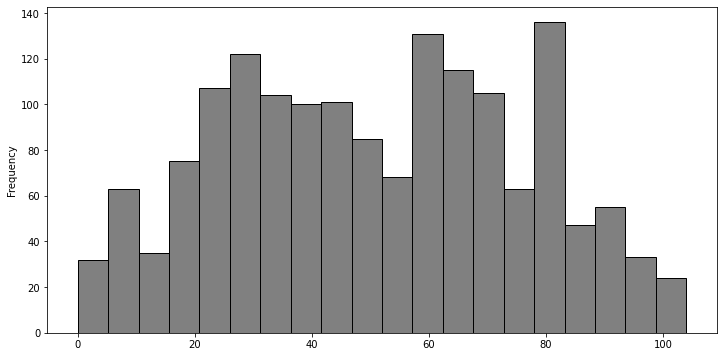

In [35]:
df['AGE'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

In [36]:
# # binning age column and remove age attribute
# bins = [i for i in range(df.AGE.min(), df.AGE.max(), 5)]
# df['AGE_BINS'] = pd.cut(x=df['AGE'], bins=bins)

# df.drop(["AGE"], axis=1, inplace=True)


## Boxplot and Removing Outlier

We can discover outliers with visualization tools:
* Box plot
* Scatter plot
* Z-Score
* IQR Score

For example:

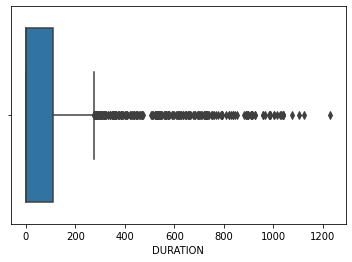

In [37]:
sns.boxplot(x=df["DURATION"])

In [38]:
df = df[df["DURATION"]<1200]
df.shape

(1600, 18)

## Countplot

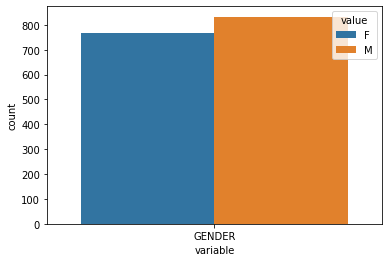

In [39]:
# distribution of GENDER attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["GENDER"]]))

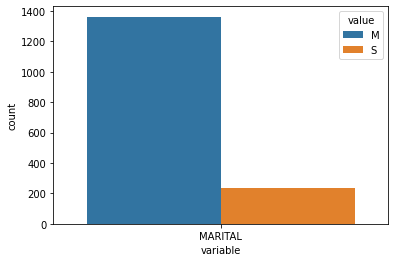

In [40]:
# distribution of Marital attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["MARITAL"]]))

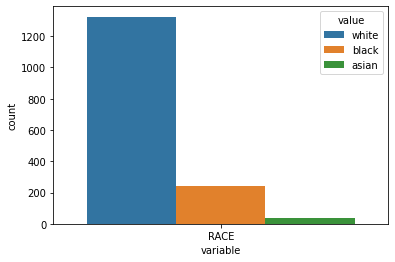

In [41]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["RACE"]]))

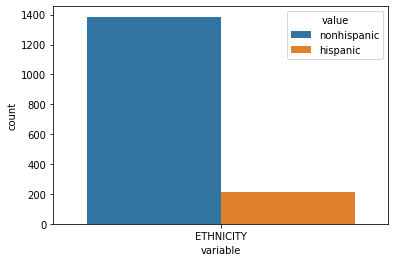

In [42]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["ETHNICITY"]]))

In [43]:
# convert categorical variable to numerical by replacing
df.GENDER.replace(['M', 'F'], [0, 1], inplace=True)
df.MARITAL.replace(['M', 'S'], [0, 1], inplace=True)
df.RACE.replace(["white", "black", "asian"], [1, 2, 3], inplace=True)
df.ETHNICITY.replace(["nonhispanic", "hispanic"], [0, 1], inplace=True)

#  Multivariate Analysis: Analyzing Relationships Between Variables

Correlation matrices and scatterplots are useful for exploring the relationship between two variables.


### Correlation Matrix


In [44]:
# list of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1600
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   1600 non-null   object        
 1   BIRTHDATE            1600 non-null   datetime64[ns]
 2   DEATHDATE            1600 non-null   datetime64[ns]
 3   MARITAL              1600 non-null   int64         
 4   RACE                 1600 non-null   int64         
 5   ETHNICITY            1600 non-null   int64         
 6   GENDER               1600 non-null   int64         
 7   CITY                 1600 non-null   object        
 8   LAT                  1600 non-null   float64       
 9   LON                  1600 non-null   float64       
 10  HEALTHCARE_EXPENSES  1600 non-null   float64       
 11  HEALTHCARE_COVERAGE  1600 non-null   float64       
 12  START                1600 non-null   datetime64[ns]
 13  STOP                 1600 non-nul

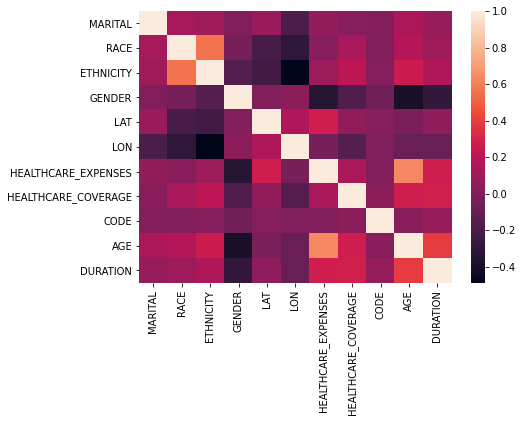

In [45]:
# Generating the correlating matrix
corr = df.corr()

plt.figure(figsize=(7, 5))
# Generating the correlation heat-map
sns.heatmap(corr, annot=False)

In [46]:
# df subset contains numerical variables
numdf = df.select_dtypes(include=np.number)
# df subset contains categorical variables
catdf = df.select_dtypes(exclude=np.number)
numdf.shape, catdf.shape

((1600, 11), (1600, 7))

In [47]:
# select feature with correlation less than a threshold
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

selected_columns = numdf.columns[columns]
selected_columns

Index(['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'LAT', 'LON',
       'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'CODE', 'AGE',
       'DURATION'],
      dtype='object')

* It is obvious correlation between GENDER and SCT_CODE_PROCEDURE < correlation between SCT_CODE_PROCEDURE and AGE.

*   AGE and GENDER are correlated.



### Scatterplot


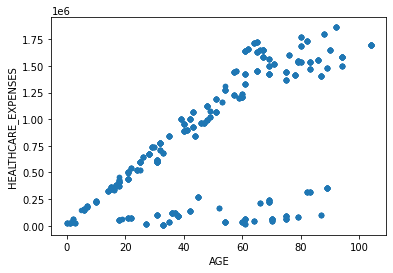

In [48]:
df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='AGE')


In [49]:
df = df[(df["AGE"]<100)]

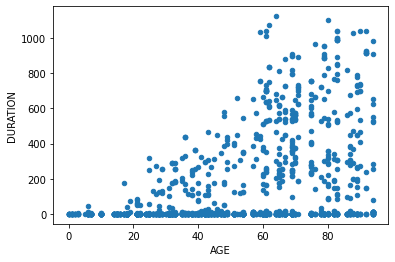

In [50]:
df.plot(kind='scatter', y='DURATION', x='AGE')


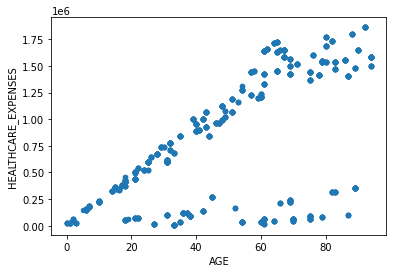

In [51]:
df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='AGE')


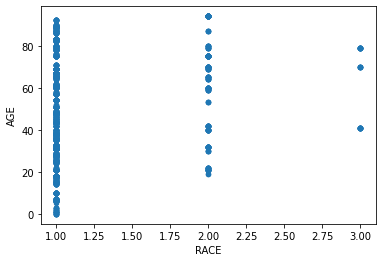

In [52]:
df.plot(kind='scatter', y='AGE', x='RACE')


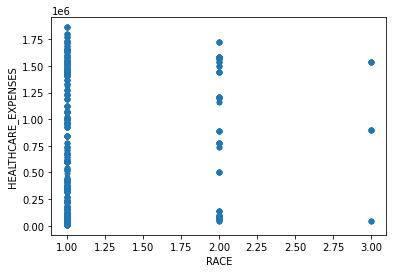

In [53]:
df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='RACE')


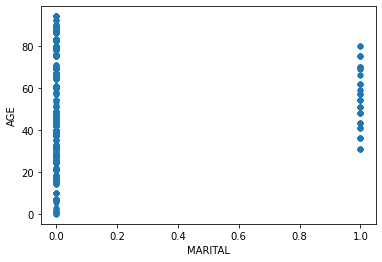

In [54]:
df.plot(kind='scatter', x='MARITAL', y='AGE')


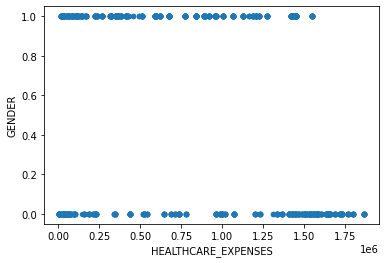

In [55]:
df.plot(kind='scatter', x='HEALTHCARE_EXPENSES', y='GENDER')


In [56]:
# sns.pairplot(df_selected)

### PCA
Principal components are the key to PCA; It is used on two use-case:
* Data visualization
* Speeding machine learning algorithms

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 

In [57]:
# select some columns
df_selected = df[[ "MARITAL", "RACE", "ETHNICITY", "GENDER", "AGE", 'DURATION', 'CODE', "HEALTHCARE_EXPENSES", 'HEALTHCARE_COVERAGE']]

In [58]:
from sklearn.preprocessing import StandardScaler


features = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'AGE', 'DURATION', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']
# # Separating out the features
x = df_selected.loc[:, features].values
# # Separating out the target
y = df_selected.loc[:,['CODE']].values
# # Standardizing the features
x = StandardScaler().fit_transform(x)

In [59]:
# check normalization
x.shape, np.mean(x), np.std(x)

((1576, 8), 2.2542599484774752e-17, 1.0)

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [61]:
finalDf = pd.concat([principalDf, df_selected[['CODE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,CODE
0,0.058622,-0.421609,19169002.0
1,-0.279712,-0.279085,162864005.0
2,-0.503633,-0.184758,197927001.0
3,-0.938401,-0.001611,10509002.0
4,-0.940035,-0.000923,444814009.0


In [62]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.31790683 0.18076751]


From the above output, you can observe that the principal component 1 holds 31.6% of the information while the principal component 2 holds only 18% of the information. Also, the other point to note is that while projecting  data to a two-dimensional data, 50% information was lost.

In [63]:
df_selected.CODE

0        19169002
1       162864005
2       197927001
3        10509002
4       444814009
          ...    
1596    248595008
1597    386661006
1598     36955009
1599    840544004
1600    840539006
Name: CODE, Length: 1576, dtype: int64

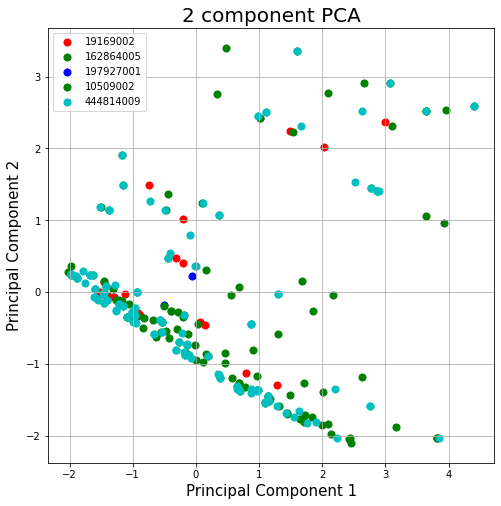

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MARITAL', 'RACE', 'ETHNICITY''GENDER', 'AGE']
targets = [19169002,162864005, 197927001, 10509002, 444814009]
colors = ['r', 'g', 'b', 'g', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CODE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Links
https://chrisalbon.com/python/basics/strings_to_datetime/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

 EDA: 
 
 https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

 https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

 https://www.analyticssteps.com/blogs/how-do-exploratory-data-analysis-building-machine-learning-models


 https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/


 PCA

 https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60